LinearRegression Model of Criticality Score Algorithm Data \\
Author: Blaise Swartwood

In [27]:
#importing required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

In [28]:
#accessing data file
df = pd.read_csv('CSDataAsCSV.csv', usecols=[i for i in range(6, 18) if i != 16])
df.head()

,created_since,updated_since,contributor_count,org_count,commit_frequency,recent_release_count,updated_issues_count,closed_issues_count,issue_comment_frequency,github_mention_count,criticality_score
0,131,0,5000,10,1555.33,69,552,266,3.18,57193965,0.92520
1,209,0,2044,5,70.83,49,896,806,13.15,36120246,0.89559
2,162,0,3472,9,48.37,67,36122,34479,2.00,1168604,0.88907
3,97,0,4367,5,138.08,65,86352,84020,2.00,529999,0.88400
4,151,0,3579,13,104.13,69,27449,26723,2.00,88134,0.87876


In [29]:
#separating features and criticality score
X = df.drop('criticality_score', axis=1)
y = df['criticality_score']

In [30]:
#splitting training vs test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

In [31]:
#building and training the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
#making predictions on test data
predictions = model.predict(X_test)

In [33]:
#Model data
print('Model slopes:', model.coef_)
print('Model intercept: ', model.intercept_)

Model slopes: [ 1.28094045e-04 -2.58763120e-04  3.05671967e-05  3.10799919e-02
  1.71704155e-04  1.18442692e-04  9.65094170e-05 -8.29989346e-05
  1.81029279e-02  9.42840512e-10]
Model intercept:  0.2197769075115254


In [34]:
#Test data
print('r2 of the test data: ', r2_score(y_test, predictions))
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

r2 of the test data:  0.7145493134866792
mean_squared_error :  0.002873489243623377
mean_absolute_error :  0.03593549628084943


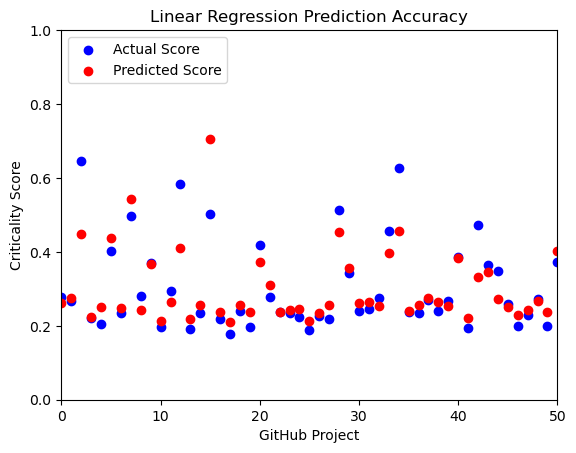

In [35]:
#Comparing first 50 predictions vs actual criticality score of test data
plt.ylim(0,1)
plt.xlim(0,50)
plt.scatter(range(len(y_test)), y_test, color='blue', label = "Actual Score")
plt.scatter(range(len(predictions)), predictions, color='red', label = "Predicted Score")
plt.xlabel("GitHub Project")
plt.ylabel("Criticality Score")
plt.title("Linear Regression Prediction Accuracy")
plt.legend(loc="upper left")
plt.show()

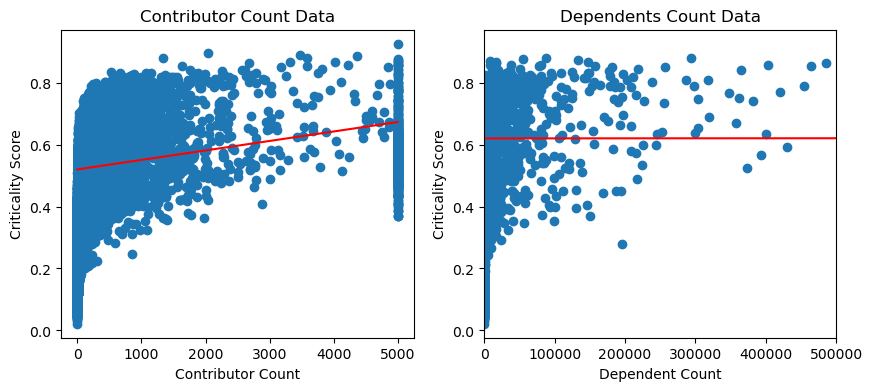

In [36]:
#Plotting each feature along with the linear regression line using the slope from above
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axes[0].scatter(X['contributor_count'], y)
axes[1].scatter(X['github_mention_count'], y)
xVAL = np.linspace(0, 5000, 100000)
yVAL = xVAL*(3.05671967e-05) + 0.5197769075115254
xVAL2 = np.linspace(0, 500000, 1000000)
yVAL2 = xVAL2*(9.42840512e-10) + 0.6197769075115254
#7
axes[0].plot(xVAL,yVAL, color = "red")
axes[1].plot(xVAL2,yVAL2, color = "red")
axes[0].set_title("Contributor Count Data")
axes[1].set_title("Dependents Count Data")
axes[0].set_xlabel("Contributor Count")
axes[0].set_ylabel("Criticality Score")
axes[1].set_xlabel("Dependent Count")
axes[1].set_ylabel("Criticality Score")
axes[1].set_xlim([0,500000])
plt.show()

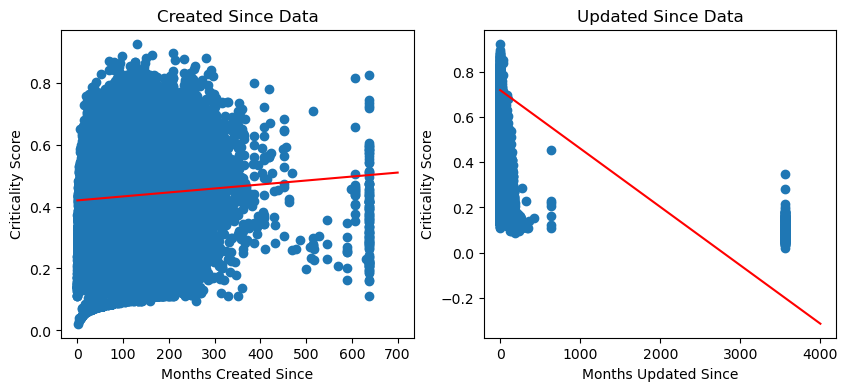

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axes[0].scatter(X['created_since'], y)
axes[1].scatter(X['updated_since'], y)
xVAL = np.linspace(0, 700, 10000)
yVAL = xVAL*(1.28094045e-04) + 0.4197769075115254
xVAL2 = np.linspace(0, 4000, 10000)
yVAL2 = xVAL2*(-2.58763120e-04) + 0.7197769075115254
axes[0].plot(xVAL,yVAL, color = "red")
axes[1].plot(xVAL2,yVAL2, color = "red")
axes[0].set_title("Created Since Data")
axes[1].set_title("Updated Since Data")
axes[0].set_xlabel("Months Created Since")
axes[0].set_ylabel("Criticality Score")
axes[1].set_xlabel("Months Updated Since")
axes[1].set_ylabel("Criticality Score")
plt.show()

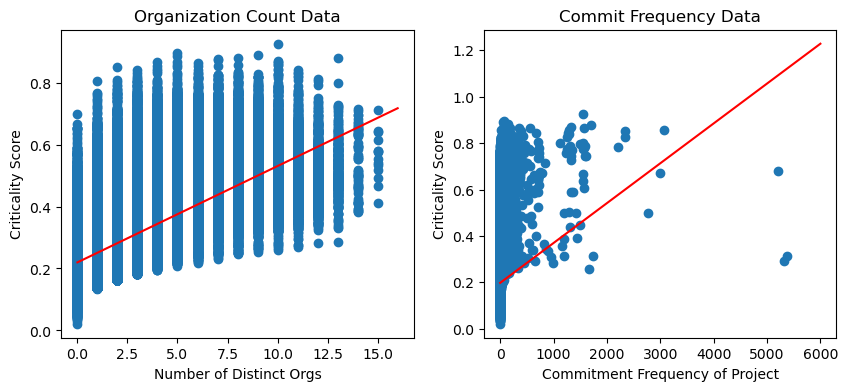

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axes[0].scatter(X['org_count'], y)
axes[1].scatter(X['commit_frequency'], y)
xVAL = np.linspace(0, 16, 100)
yVAL = xVAL*(3.10799919e-02) + 0.2197769075115254
xVAL2 = np.linspace(0, 6000, 10000)
yVAL2 = xVAL2*(1.71704155e-04) + 0.197769075115254
axes[0].plot(xVAL,yVAL, color = "red")
axes[1].plot(xVAL2,yVAL2, color = "red")
axes[0].set_title("Organization Count Data")
axes[1].set_title("Commit Frequency Data")
axes[0].set_xlabel("Number of Distinct Orgs")
axes[0].set_ylabel("Criticality Score")
axes[1].set_xlabel("Commitment Frequency of Project")
axes[1].set_ylabel("Criticality Score")
plt.show()

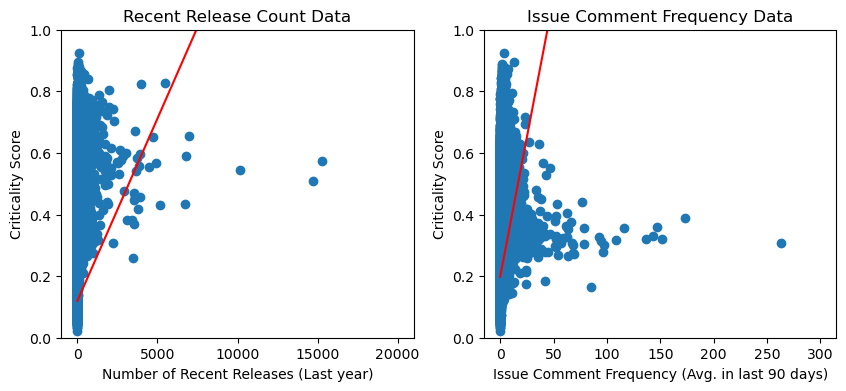

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axes[0].scatter(X['recent_release_count'], y)
axes[1].scatter(X['issue_comment_frequency'], y)
xVAL = np.linspace(0, 20000, 10000)
yVAL = xVAL*(1.18442692e-04) + 0.1197769075115254
xVAL2 = np.linspace(0, 300, 10000)
yVAL2 = xVAL2*( 1.81029279e-02) + 0.197769075115254
axes[0].plot(xVAL,yVAL, color = "red")
axes[1].plot(xVAL2,yVAL2, color = "red")
axes[0].set_title("Recent Release Count Data")
axes[1].set_title("Issue Comment Frequency Data")
axes[0].set_xlabel("Number of Recent Releases (Last year)")
axes[0].set_ylabel("Criticality Score")
axes[1].set_xlabel("Issue Comment Frequency (Avg. in last 90 days)")
axes[1].set_ylabel("Criticality Score")
axes[0].set_ylim([0,1])
axes[1].set_ylim([0,1])
plt.show()

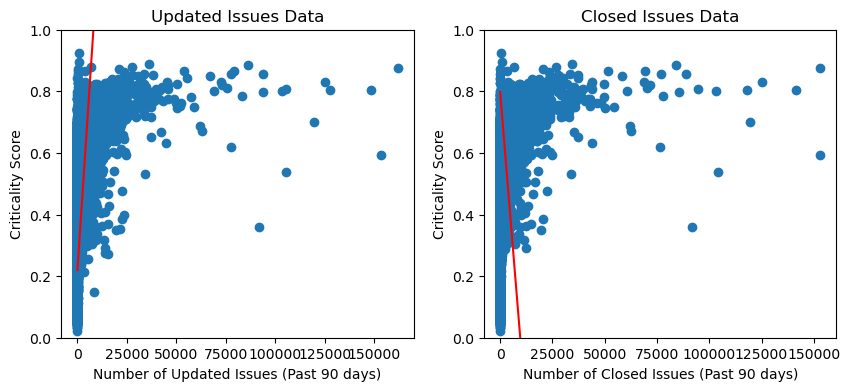

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axes[0].scatter(X['updated_issues_count'], y)
axes[1].scatter(X['closed_issues_count'], y)
xVAL = np.linspace(0, 75000, 100000)
yVAL = xVAL*(9.65094170e-05) + 0.2197769075115254
xVAL2 = np.linspace(0, 75000, 100000)
yVAL2 = xVAL2*(-8.29989346e-05) + 0.797769075115254
axes[0].plot(xVAL,yVAL, color = "red")
axes[1].plot(xVAL2,yVAL2, color = "red")
axes[0].set_title("Updated Issues Data")
axes[1].set_title("Closed Issues Data")
axes[0].set_xlabel("Number of Updated Issues (Past 90 days)")
axes[0].set_ylabel("Criticality Score")
axes[1].set_xlabel("Number of Closed Issues (Past 90 days)")
axes[1].set_ylabel("Criticality Score")
axes[0].set_ylim([0,1])
axes[1].set_ylim([0,1])
plt.show()